In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
class SingleNeuron(nn.Module):
    def __init__(self):
        super(SingleNeuron, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 1),
            nn.Identity(),
        )

        with torch.no_grad():
            self.fc[0].weight.fill_(0.4)
            self.fc[0].bias.fill_(-1.)

    def forward(self, x):
        return self.fc(x)


class MultiNeurons(nn.Module):
    def __init__(self):
        super(MultiNeurons, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 1),
            nn.Tanh(),
        )

        with torch.no_grad():
            self.fc[0].weight.fill_(0.4)
            self.fc[0].bias.fill_(-1.)

    def forward(self, x):
        return self.fc(x)

#   def __init__(self):
#     super(MultiNeurons, self).__init__()
#     self.fc1 = nn.Sequential(
#         nn.Linear(1, 1),
#         nn.Tanh(),
#     )
#     self.fc2 = nn.Sequential(
#         nn.Linear(1, 1),
#         nn.Tanh(),
#     )
    
#     with torch.no_grad():
#         self.fc1[0].weight.fill_(0.4)
#         self.fc1[0].bias.fill_(-1.)
#         self.fc2[0].weight.fill_(-0.5)
#         self.fc2[0].bias.fill_(0.)
    
#   def forward(self, x):
#     return self.fc2(self.fc1(x))

In [5]:
single_neuron = SingleNeuron()
multi_neurons = MultiNeurons()

In [6]:
input_ = torch.tensor([10.])
input_

tensor([10.])

In [7]:
single_neuron(input_)

tensor([3.], grad_fn=<AddBackward0>)

In [8]:
multi_neurons(input_)

tensor([0.9951], grad_fn=<TanhBackward0>)

In [9]:
n = [x/10 for x in range(-50,51)]
input_ = torch.tensor(n, dtype=torch.float32).reshape(-1,1)

In [10]:
sn = single_neuron(input_).reshape(-1, input_.shape[0])[0].tolist()
mn = multi_neurons(input_).reshape(-1, input_.shape[0])[0].tolist()

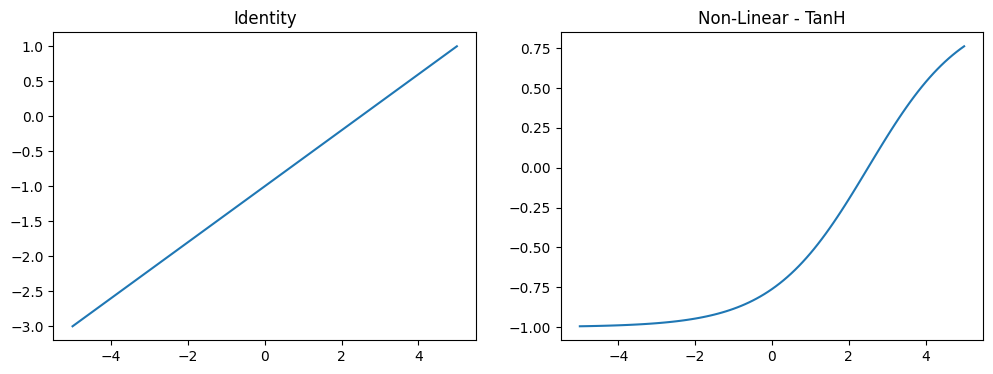

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.lineplot(x=n, y=sn, ax=ax[0])
sns.lineplot(x=n, y=mn, ax=ax[1])

ax[0].set_title('Identity')
ax[1].set_title('Non-Linear - TanH')

plt.show()

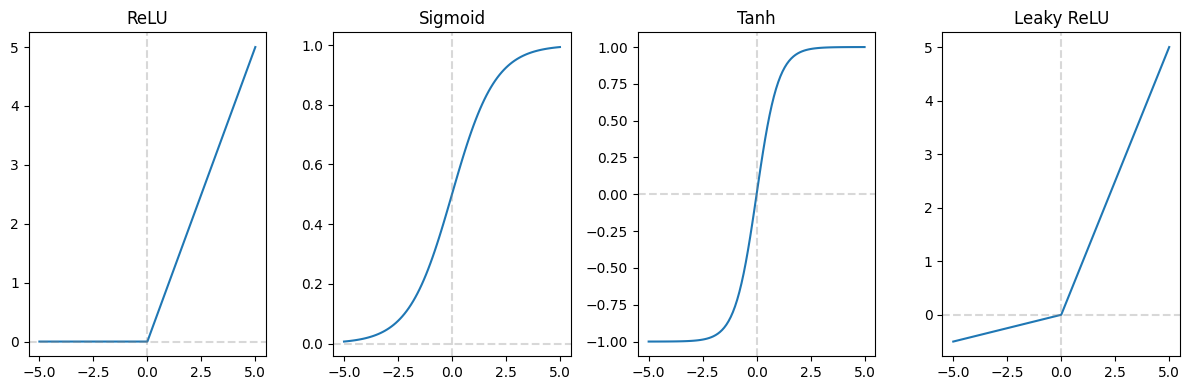

In [14]:
n = torch.tensor([x/10 for x in range(-50,51)])

act_functions = {
    'ReLU': F.relu(n),
    'Sigmoid': F.sigmoid(n),
    'Tanh': F.tanh(n),
    'Leaky ReLU': F.leaky_relu(n, 0.1)

}

fig, ax = plt.subplots(1, 4, figsize=(12,4))

for a, k in zip(ax, act_functions.keys()): 
    sns.lineplot(x=n, y=act_functions[k], ax=a)
    a.set_title(k)
    a.axhline(0, linestyle='--', alpha=0.3, color='gray')
    a.axvline(0, linestyle='--', alpha=0.3, color='gray')
    
plt.tight_layout()
plt.show()

## Softmax & Cross Entropy

In [39]:
# sm_input_ = torch.tensor(np.random.randn(5))
sm_input_ = torch.tensor([-1.0, 0.0, 0.5, 1])
sm_input_

tensor([-1.0000,  0.0000,  0.5000,  1.0000])

In [40]:
sigma = F.softmax(sm_input_, dim=0)
sigma

tensor([0.0641, 0.1744, 0.2875, 0.4740])

In [42]:
sm_input_ = torch.tensor([0.0, 0.0, 0.0, 1])
sigma = F.softmax(sm_input_, dim=0)
sigma

tensor([0.1749, 0.1749, 0.1749, 0.4754])

In [49]:
sm_input_ = torch.tensor([-10.0, -10.0, -10.0, 1])
sigma = F.softmax(sm_input_, dim=0)
sigma

tensor([1.6701e-05, 1.6701e-05, 1.6701e-05, 9.9995e-01])

In [55]:
sm_input_ = torch.tensor([-1.0, 0.0, 0.5, 1])
sigma = F.softmax(sm_input_, dim=0)
ce_target_ = torch.tensor([0.0, 0.0, 0.0, 1.0])

ce = F.cross_entropy(sm_input_, ce_target_)
ce

tensor(5.0067e-05)

In [50]:
sigma

tensor([1.6701e-05, 1.6701e-05, 1.6701e-05, 9.9995e-01])

In [54]:
- (-torch.log(sigma) * ce_target_).sum()

tensor(-5.0069e-05)